In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sess = tf.Session()

In [114]:
with open('../keypoint_data.pickle', 'rb') as handle:
    b = pickle.load(handle)
    
with open('../don_data.pickle', 'rb') as handle:
    c = pickle.load(handle)

$[batch, 4, 4] * [batch, num\_keypoints, 4] = [batch, num\_keypoints, 4]$

In [8]:
b.shape

TensorShape([Dimension(2), Dimension(2), Dimension(2)])

In [4]:
# experiment with multiplication

d = tf.constant([[[1.0, 1.0], [1.0, 0.0]],
                [[1.0, 2.0], [3.0, 1.0]]])

a = tf.constant([[[1.0, 2.0], [3.0, 4.0]],
                [[1.0, 2.0], [3.0, 4.0]]])

b = tf.constant([[[0.0, 0.0], [0.0, 1.0]],
                [[1.0, 2.0], [3.0, 4.0]]])

c = tf.matmul(a, b)

TensorShape([Dimension(2), Dimension(2), Dimension(2)])

In [6]:
print("a shape", a.shape)
print(sess.run(a))
print("d shape", d.shape)
print(sess.run(d))

d_reshaped = tf.reshape(d, [-1, d.shape[2]])

print("d_reshaped", d_reshaped.shape)
print(sess.run(d_reshaped))

a shape (2, 2, 2)
[[[1. 2.]
  [3. 4.]]

 [[1. 2.]
  [3. 4.]]]
d shape (2, 2, 2)
[[[1. 1.]
  [1. 0.]]

 [[1. 2.]
  [3. 1.]]]
d_reshaped (4, 2)
[[1. 1.]
 [1. 0.]
 [1. 2.]
 [3. 1.]]


In [176]:
sess.run(tf.matmul(a, d))

array([[[ 3.,  1.],
        [ 7.,  3.]],

       [[ 7.,  4.],
        [15., 10.]]], dtype=float32)

In [168]:
val = tf.matmul(a, tf.transpose(d, [0, 2, 1]))
val = tf.transpose(val, [0, 2, 1])

In [169]:
sess.run(val)

array([[[ 3.,  7.],
        [ 1.,  3.]],

       [[ 5., 11.],
        [ 5., 13.]]], dtype=float32)

In [171]:
apple = sess.run(a[0])
print(apple)

[[1. 2.]
 [3. 4.]]


In [172]:
dog = sess.run(d)
print(dog)

[[[1. 1.]
  [1. 0.]]

 [[1. 2.]
  [3. 1.]]]


In [174]:
np.matmul(apple, dog[1][1])

array([ 5., 13.], dtype=float32)

In [47]:
a.shape

TensorShape([Dimension(2), Dimension(2), Dimension(2)])

In [40]:
sess.run(c)

array([[[ 0.,  2.],
        [ 0.,  4.]],

       [[ 7., 10.],
        [15., 22.]]], dtype=float32)

In [13]:
import glob

filenames = glob.glob("../../data/cars_with_keypoints/*tfrecord")

In [20]:
myfiles = glob.glob("../datasets/00004/*tfrecord")

In [21]:
myfiles

['../datasets/00004/00000.tfrecord']

In [14]:
filename = filenames[0]

In [22]:
count = 0
for record in tf.python_io.tf_record_iterator(myfiles[0]):
    count += 1

In [23]:
count

2

In [5]:
# unpack the data
img0 = b['img0']
img1 = b['img1']

mv0 = b['mv0']
mvi0 = b['mvi0']
mv1 = b['mv1']
mvi1 = b['mvi1']

# unpack the dense object nets data
don_img0 = c['img0']
don_img1 = c['img1']

don_mv0 = c['mv0']
don_mvi0 = c['mvi0']
don_mv1 = c['mv1']
don_mvi1 = c['mvi1']

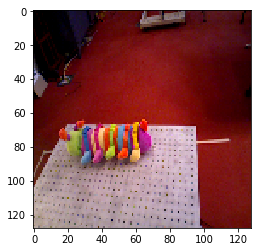

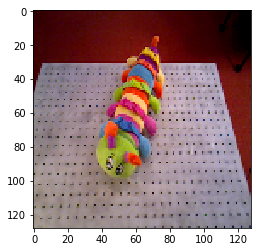

In [6]:
plt.imshow(don_img0)
plt.show()
plt.imshow(don_img1)
plt.show()

In [7]:
import sys
sys.path.append("../")

In [8]:
from models.research.keypointnet.main import Transformer

In [9]:
# do some stuff with a dataset
# t = Transformer(128, 128, "../../data/cars_with_keypoints/")
t = Transformer(128, 128, "../datasets/00000/")

In [10]:
pinv_t = sess.run(t.pinv_t)
pinv_t

array([[ 0.00187391,  0.        , -0.5985454 ],
       [ 0.        ,  0.00186992, -0.4421189 ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)

In [11]:
sess.run(t.p)

array([[533.6423 ,   0.     , 319.4091 ],
       [  0.     , 534.7825 , 236.43742],
       [  0.     ,   0.     ,   1.     ]], dtype=float32)

In [12]:
# [x] # u in (-1, 1) range
# [x] # v in (-1, 1) range

# [x] # map u (-1, 1) -> u = (0, 640-1)
# [x] # map v (-1, 1) -> u = (0, 480-1)

# [check this] # then multiply [u, v, 1] by z prediction

# [check this]# now we have vector [u*z, v*z, 1*z] 

# [check this] # then multiply t.pinv_t (which is the inv K matrix) * [u*z, v*z, 1*z]
# [check this] # = camera frame
# [check this] # this is world coords in camera frame
# [check this] # add 1 to make it homogeneours
# [check this] # now [x, y, z, 1]

# # transform from one frame to the other
# # world coordinates in other frame = (transform from b to a) * [x, y, z, 1]

# # divide everything by z to get back to normalized

# # projectb back into camera frame with self.p (K matrix)
# # camera frame = self.p * world coordinates [:3] (don't need the z value of 1)

# [x] # go back to normalized coordinates
# [x] # (0, 640) -> (-1, 1)
# [x] # (0, 480) -> (-1, 1)


In [13]:
# pipelines steps

# the regressed keypoints
keypoints = []
keypoints.append([122.311, 28.28, 0.707])
# keypoints.append([-0.5, 0.0, .5])
# keypoints.append([0.5, -1.0, .2])
keypoints = np.array(keypoints)

# make a batch
batch = []
batch.append(keypoints)
batch = np.array(batch)

# turn into tensor
a = tf.convert_to_tensor(batch, dtype=tf.float32)

b = t.scale_image_coords_to_normalized_coords(a)

In [14]:
sess.run(b)

array([[[-0.6177781 , -0.88216674,  0.707     ]]], dtype=float32)

In [15]:
# pipelines steps

# the regressed keypoints
keypoints = []
keypoints.append([0.5, 1.0, .5])
keypoints.append([-0.5, 0.0, .5])
keypoints.append([0.5, -1.0, .2])
keypoints.append([-0.6177781, -0.88216674, 0.707])
keypoints = np.array(keypoints)

# make a batch
batch = []
batch.append(keypoints)
batch = np.array(batch)

# turn into tensor
xyz = tf.convert_to_tensor(batch, dtype=tf.float32)

# # get the z values
# z = xyz[:, :, 2:]

# # convert to image coordinates and get the first two
# uv = t.scale_normalized_coords_to_image_coords(xyz)[:, :, :2]

# # check that this multiplication by z is correct
# uvz = tf.concat([uv * z, z], axis=2)

world_coords = t.unproject(xyz)

# now I would project into the other frame

back = t.project(world_coords)



In [16]:
sess.run(xyz)

array([[[ 0.5       ,  1.        ,  0.5       ],
        [-0.5       ,  0.        ,  0.5       ],
        [ 0.5       , -1.        ,  0.2       ],
        [-0.6177781 , -0.88216674,  0.707     ]]], dtype=float32)

In [17]:
sess.run(world_coords)

array([[[ 0.1504668 ,  0.22772117,  0.5       ,  1.        ],
        [-0.14935952,  0.00333086,  0.5       ,  1.        ],
        [ 0.06018671, -0.08842378,  0.2       ,  1.        ],
        [-0.26112694, -0.275191  ,  0.707     ,  1.        ]]],
      dtype=float32)

In [18]:
sess.run(back)

array([[[ 5.0000000e-01,  1.0000000e+00,  5.0000000e-01],
        [-5.0000012e-01, -6.3578291e-08,  5.0000000e-01],
        [ 4.9999991e-01, -1.0000000e+00,  2.0000000e-01],
        [-6.1777824e-01, -8.8216686e-01,  7.0700002e-01]]], dtype=float32)

In [19]:
sess.run(t.pinv_t)

array([[ 0.00187391,  0.        , -0.5985454 ],
       [ 0.        ,  0.00186992, -0.4421189 ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)